# Notebook for processing and plotting Cardenas Basalts and Unkar Intrusions related geocheical attributes

## import python packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyrolite 
from pyrolite.util.classification import TAS
from pyrolite.plot import pyroplot

from pyrolite.geochem.ind import REE
from pyrolite import geochem
from pyrolite.geochem.norm import get_reference_composition, all_reference_compositions
%matplotlib inline
%config InlineBackend.figure_format='retina'

## import Larson 1994 major and trace element geochemical data

In [36]:
Larson1994_major_data = pd.read_csv('../data/geochem/Larson1994a_major.csv')
Larson1994a_trace_data = pd.read_csv('../data/geochem/Larson1994a_trace.csv')
# Larson1994a_trace_data = Larson1994a_trace_data.dropna()

In [13]:
Larson1994a_trace_data.columns

Index(['Flow No.', 'name', 'Ba', 'Rb', 'Th', 'K2O', 'Nb', 'Ta', 'La', 'Ce',
       'Sr', 'Nd', 'P2O5', 'Sm', 'Eu', 'Zr', 'Hf', 'TiO2', 'Tb', 'Y', 'Yb',
       'Lu', 'V', 'Sc', 'Cr', 'Ni', 'Co', 'Zn'],
      dtype='object')

In [7]:
Larson1994_major_data.columns

Index(['No.', 'flow member', 'Rock type', 'SiO2', 'Al2O3', 'Fe2O3', 'FeO',
       'MgO', 'CaO', 'Na2O', 'K2O', 'TiO2', 'P2Os', 'Total', 'Mg#'],
      dtype='object')

## TAS diagram

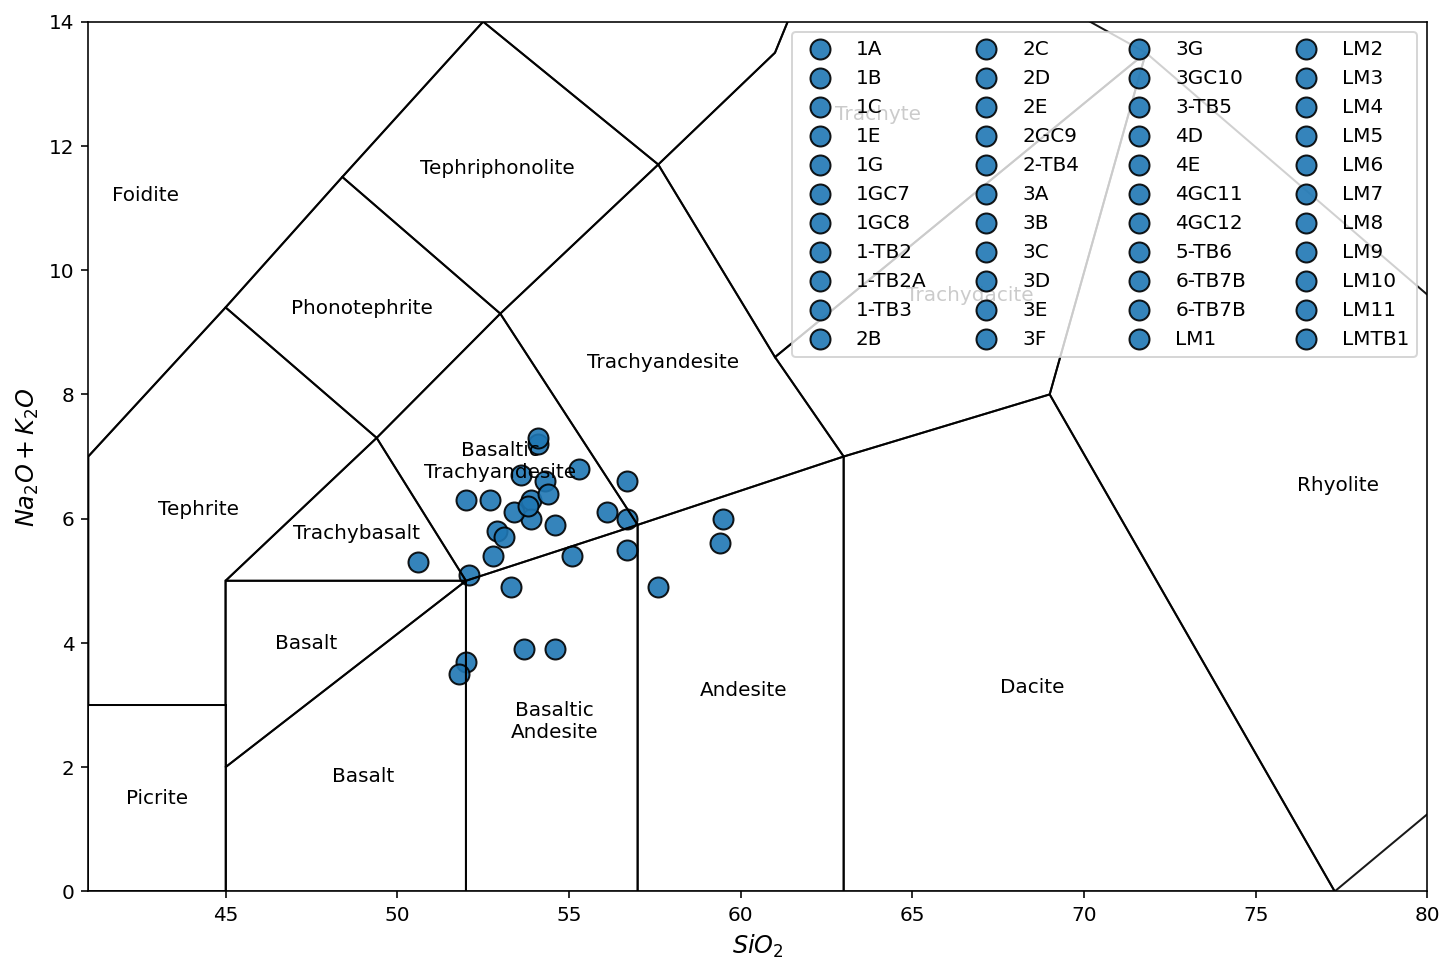

In [12]:
cm = TAS()
fig, ax = plt.subplots(1, figsize = (12,8))
for i in range(Larson1994_major_data.shape[0]):
    ax.scatter(Larson1994_major_data["SiO2"][i], Larson1994_major_data["Na2O"][i]+Larson1994_major_data['K2O'][i], 100,
                   c= 'C0', marker = 'o',  edgecolor = 'black', alpha=0.9, 
               label = Larson1994_major_data['No.'][i])
cm.add_to_axes(ax, alpha=0.9, zorder=-1, labels='volcanic')

plt.xlim(41,80)
plt.ylim(0,14)
plt.legend(ncol=4, loc='upper right', fontsize=10, frameon=True, facecolor='white')

plt.show()

## trace element diagram

In [21]:
chondrite = get_reference_composition("Chondrite_SM89")
CI = chondrite.set_units("ppm")
chondrite.comp.columns

Index(['Cs', 'Tl', 'Rb', 'Ba', 'W', 'Th', 'U', 'Nb', 'Ta', 'K', 'La', 'Ce',
       'Pb', 'Pr', 'Mo', 'Sr', 'P', 'Nd', 'F', 'Sm', 'Zr', 'Hf', 'Eu', 'Sn',
       'Sb', 'Ti', 'Gd', 'Tb', 'Dy', 'Li', 'Y', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

In [ ]:
Larson1994a_trace_data.columns

Index(['Flow No.', 'name', 'Ba', 'Rb', 'Th', 'K2O', 'Nb', 'Ta', 'La', 'Ce',
       'Sr', 'Nd', 'P2O5', 'Sm', 'Eu', 'Zr', 'Hf', 'TiO2', 'Tb', 'Y', 'Yb',
       'Lu', 'V', 'Sc', 'Cr', 'Ni', 'Co', 'Zn'],
      dtype='object')

In [30]:
trace_elements = ['Ba', 'Rb', 'Th', 'Nb', 'Ta', 'La', 'Ce', 'Sr', 'Nd', 
                  'Sm', 'Zr', 'Hf', 'Tb', 'Y', 'Yb', 'Lu']
trace_elements_chondrite = ['Ba', 'Rb', 'Th', 'Nb', 'Ta', 'La', 'Ce', 'Sr', 'Nd',
                  'Sm', 'Zr', 'Hf', 'Tb', 'Y', 'Yb', 'Lu']

In [31]:
chondrite.comp[trace_elements_chondrite].values[0]

array([2.41  , 2.32  , 0.029 , 0.246 , 0.014 , 0.237 , 0.612 , 7.26  ,
       0.467 , 0.153 , 3.87  , 0.1066, 0.0374, 1.57  , 0.17  , 0.0254])

No handles with labels found to put in legend.


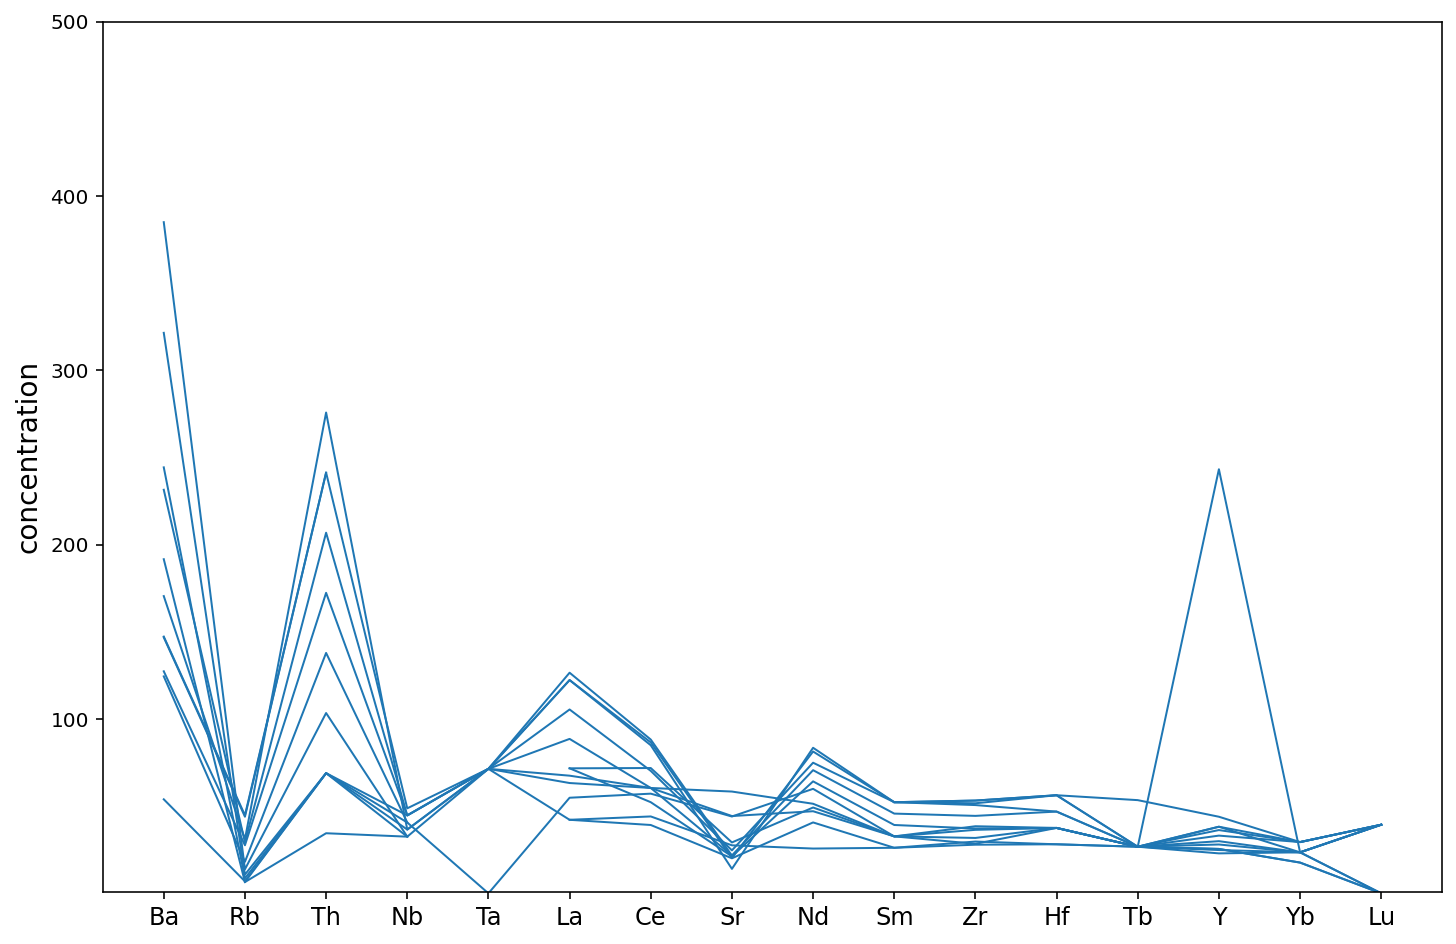

In [38]:
fig, ax = plt.subplots(1, figsize = (12, 8))

for i in range(Larson1994a_trace_data.shape[0]):
    
    ax.plot(trace_elements, Larson1994a_trace_data[trace_elements].iloc[i]/chondrite.comp[trace_elements_chondrite].values[0], 
            color = 'C0', markersize=5)

# plt.yscale('log')
plt.ylim(1, 500)
plt.ylabel('concentration', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', fontsize=14)
plt.show(fig)